In [73]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

# !pip install matplotlib --upgrade

import re

# for NLP
import nltk 

# For tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# for stopwords removal
from nltk.corpus import stopwords
nltk.download('stopwords')

# for lemmatization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# for BOW and tf-idf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


##------------
# for Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

### Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report


[nltk_data] Downloading package punkt to /Users/anshu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/anshu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anshu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The goal of this project is to categorize news articles into several categories like politics, technology, sports, business and entertainment based on their content

In [2]:
df = pd.read_csv("flipitnews-data.csv")

In [6]:
df.shape

(2225, 2)

In [4]:
df.sample(10)

,Category,Article
987,Entertainment,john peel replacement show begins the permanen...
1073,Entertainment,sundance to honour foreign films international...
914,Business,us economy shows solid gdp growth the us econo...
1388,Entertainment,jungle tv show ratings drop by 4m the finale o...
83,Business,news corp makes $5.4bn fox offer news corporat...
41,Sports,federer claims dubai crown world number one ro...
313,Technology,speech takes on search engines a scottish firm...
1607,Politics,hunt demo at labour meeting pro-hunt supporter...
1763,Sports,mourinho to escape fa charge chelsea boss jose...
96,Business,oil rebounds from weather effect oil prices re...


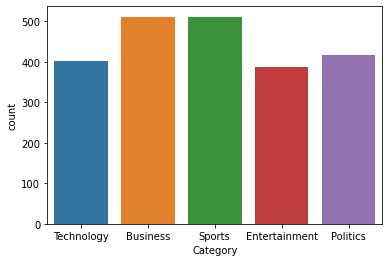

In [25]:
ax =sns.countplot(x='Category', data = df)
plt.show()

In [26]:
df['Article'][1]

'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

### data preprocessing

In [35]:
stop_words = list(stopwords.words("english"))

def text_preprocess(sentence):
    
#     Removing special characters
    sentence = re.sub('[^A-Za-z]',' ',sentence)
    
#     word tokenize the sentence
    words = nltk.word_tokenize(sentence)
    
#     removing the stop words
    filtered_sentence = [w for w in words if w not in stop_words]
    
#     lemmatization
    lemmatizer = WordNetLemmatizer()
    new_text = [lemmatizer.lemmatize(word) for word in filtered_sentence]
    new_text = ' '.join(new_text)
    
    return new_text



In [39]:
df['Article'] = df['Article'].apply(text_preprocess)

### after processing

In [40]:
df['Article'][1]

'worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing bn bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers transformed

### data transformation

### target variable encoding

In [44]:
df['Category'].unique()

array(['Technology', 'Business', 'Sports', 'Entertainment', 'Politics'],
      dtype=object)

In [47]:
df['Category_enc'] = df['Category'].map({'Technology':1,'Business':2, 'Sports':3, 'Entertainment':4,
                   'Politics':5})

In [56]:
Choice = int(input("Choose \n (1) If you want to use bag of words \n (2) If you want to use TF-IDF \n Choice: "))

Choose 
 (1) If you want to use bag of words 
 (2) If you want to use TF-IDF 
 Choice:  2


In [57]:
if Choice == 1:
    cv = CountVectorizer(max_features = 5000)
    X = cv.fit_transform(df['Article']).toarray()
    y = np.array(df['Category_enc'].values)
elif Choice == 2:
    tf_idf = TfidfVectorizer()
    X = tf_idf.fit_transform(df['Article']).toarray()
    y = np.array(df['Category_enc'].values)
else:
    print("Wrong input")

In [67]:
from sklearn.model_selection import train_test_split

### train-test split


In [68]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.25,
                                                 shuffle=True, stratify = y,
                                                 random_state = 42)

In [69]:
print("train data", X_train.shape, y_train.shape)
print("validation data", X_val.shape, y_val.shape)

train data (1668, 24718) (1668,)
validation data (557, 24718) (557,)


In [71]:
X_train[2]

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
np.array(df['Category_enc'].values)

array([1, 2, 3, ..., 4, 5, 3])

### Classifier

### 1. naive Bayes Classifier


In [74]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [83]:
nb_train = accuracy_score(y_train, nb.predict(X_train))
nb_val = accuracy_score(y_val, nb.predict(X_val))

print("train accuracy is:{:.3f}".format(nb_train))
print("val accuracy is:{:.3f}".format(nb_val))

train accuracy is:0.988
val accuracy is:0.977


In [85]:
y_pred_nb = nb.predict(X_val)
y_pred_proba_nb = nb.predict_proba(X_val)

In [87]:
print("roc auc score:{:.3f}".format(roc_auc_score(y_val, y_pred_proba_nb,multi_class='ovr')))

roc auc score:0.999


In [91]:
precision = precision_score(y_val, y_pred_nb, average = 'weighted')
recall =recall_score(y_val, y_pred_nb, average = 'weighted')
f1 = f1_score(y_val, y_pred_nb, average = 'weighted')

print("precision:{:.3f}".format(precision))
print("recall:{:.3f}".format(recall))
print("f1:{:.3f}".format(f1))

precision:0.977
recall:0.977
f1:0.977


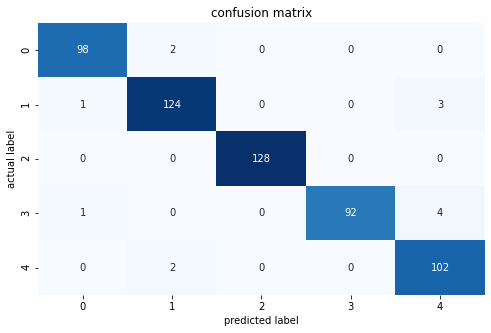

In [93]:
cm = confusion_matrix(y_val, y_pred_nb)

plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt= 'd',cbar = False, cmap='Blues')
plt.title("confusion matrix")
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

In [94]:
print(classification_report(y_val, y_pred_nb))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       100
           2       0.97      0.97      0.97       128
           3       1.00      1.00      1.00       128
           4       1.00      0.95      0.97        97
           5       0.94      0.98      0.96       104

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557



### functionalized code

In [100]:
def model_train(classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    y_pred_proba = classifier.predict_proba(X_val)
    return y_pred, y_pred_proba

In [98]:
def model_eval(classifier, y_pred, y_pred_proba):
    print("----------------------------")
    # Calculating the train & test accuracy      
    train_acc = accuracy_score(y_train, classifier.predict(X_train))
    test_acc = accuracy_score(y_val, classifier.predict(X_val))

    print("Train Accuracy: {:.3f}".format(train_acc))
    print("Test Accuracy: {:.3f}\n".format(test_acc))

    # Computing the ROC AUC score
    print("ROC AUC Score: {:.3f}\n".format(roc_auc_score(y_val, y_pred_proba, multi_class='ovr')))

    # Computing the precision, recall & f1 score
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')

    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("F1 Score: {:.3f}".format(f1))

    print("-------------------------")

### 2. decision tree classifier

In [101]:
dt = DecisionTreeClassifier()
y_pred, y_pred_proba = model_train(dt)

In [102]:
model_eval(dt,y_pred, y_pred_proba)

----------------------------
Train Accuracy: 1.000
Test Accuracy: 0.865

ROC AUC Score: 0.915

Precision: 0.866
Recall: 0.865
F1 Score: 0.866
-------------------------


### 3. Nearest Neighbors Classifier

In [104]:
knn = KNeighborsClassifier(n_neighbors=5)
y_pred, y_pred_proba = model_train(knn)

In [105]:
model_eval(knn,y_pred, y_pred_proba)

----------------------------
Train Accuracy: 0.965
Test Accuracy: 0.934

ROC AUC Score: 0.988

Precision: 0.935
Recall: 0.934
F1 Score: 0.933
-------------------------


### 4. Random Forest Classifer

In [106]:
rf = KNeighborsClassifier()
y_pred, y_pred_proba = model_train(rf)

In [107]:
model_eval(rf,y_pred, y_pred_proba)

----------------------------
Train Accuracy: 0.965
Test Accuracy: 0.934

ROC AUC Score: 0.988

Precision: 0.935
Recall: 0.934
F1 Score: 0.933
-------------------------


### naive bayes classifier seems to give better performance-high accuracy, less overfitting, better precision and recall